# This is based on the sample code provided by TA2019
# at https://ntumlta2019.github.io/ml-web-hw2/LogisticRegression.html

In [1]:
# get the training data
import numpy as np
import pandas as pd

X_train = np.genfromtxt('X_train', delimiter=',', skip_header=1)
# X_train = np.array(pd.read_csv("X_train"), dtype=float)

In [2]:
X_train.shape

(32561, 106)

In [3]:
Y_train = np.genfromtxt('Y_train', delimiter=',')
# Y_train = np.array(pd.read_csv("Y_train", header=None), dtype=float)

In [4]:
Y_train.shape

(32561,)

In [5]:
# normalize data
# 0 age, 1 fnlwgt, 3 capital_gain, 4 capital_loss, 5 hours_per_week

# col = [0,1,3,4,5,7,10,12,25,26,27,28] # this line by TA does not make sense
col = [0,1,3,4,5]

In [6]:
# into _normalize_column_normal
length = len(col)
X_mean = np.reshape(np.mean(X_train[:,col],0), (1, length))

In [7]:
X_mean

array([[3.85816468e+01, 1.89778367e+05, 1.07764884e+03, 8.73038297e+01,
        4.04374559e+01]])

In [8]:
X_std = np.reshape(np.std(X_train[:,col],0), (1, length))

In [9]:
X_std

array([[1.36402231e+01, 1.05548357e+05, 7.38517868e+03, 4.02954031e+02,
        1.23472391e+01]])

In [10]:
X_train[:,col] = np.divide(np.subtract(X_train[:,col],X_mean), X_std)

In [11]:
X_train

array([[ 0.03067056, -1.06361075,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.83710898, -1.008707  ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.04264203,  0.2450785 ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.42360965, -0.35877741,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.21564337,  0.11095988,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.98373415,  0.92989258,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [12]:
# end of X_train normalization
# this makes age, fnlwgt, capital_gain, capital_loss, hours_per_week data into normal distribution

In [13]:
# step into the train(X_train, Y_train) function

# first, split a validation set
dev_size = 0.1155
train_len = int(round(len(X_train)*(1-dev_size)))

In [14]:
train_len

28800

In [15]:
X_train_data = X_train[0:train_len] # use a different variable name to maintain source data

In [16]:
X_train_data.shape

(28800, 106)

In [17]:
Y_train_data = Y_train[0:train_len]

In [18]:
Y_train_data.shape

(28800,)

In [19]:
X_dev = X_train[train_len:None]
Y_dev = Y_train[train_len:None]

In [20]:
X_dev.shape

(3761, 106)

In [21]:
# X_train_data and Y_train data are training set

# step 2, use 0+0*x1+0*x2+... for weight initialization
w = np.zeros((X_train_data.shape[1],))
b = np.zeros((1,))

In [22]:
regularize = True
lamda = 0.001
max_iter = 40
batch_size = 32
learning_rate = 0.2

In [23]:
num_train = len(Y_train_data)
num_dev = len(Y_dev)
step = 1

In [24]:
loss_train = []
loss_validation = []
train_acc = []
dev_acc = []

In [25]:
# into the training epochs
for epoch in range(max_iter):
    # random shuffle for each epoch
    # into the _shuffle(,)
    randomize = np.arange(len(X_train_data))
    np.random.shuffle(randomize)
    X_train_data = X_train_data[randomize]
    Y_train_data = Y_train_data[randomize]
    #print(X_train_data.shape)
    #print(Y_train_data.shape)
    # done _shuffle(,)
    
    total_loss = 0.0
    # Logistic regression train with batch
    for idx in range(int(np.floor(len(Y_train_data)/batch_size))):
        X = X_train_data[idx*batch_size:(idx+1)*batch_size]
        Y = Y_train_data[idx*batch_size:(idx+1)*batch_size]
            
        # Find out the gradient of the loss
        # w_grad, b_grad = _gradient_regularization(X, Y, w, b, lamda)
        
        # step into _gradient_regularization
        # return the mean of the graident
        # y_pred = get_prob(X, w, b)
        
        # step into get_prob
        # the probability to output 1
        # y_pred = _sigmoid(np.add(np.matmul(X_train_data, w), b))
        
        # step into _sigmoid
        _temp_z = np.add(np.matmul(X_train_data, w), b)
        y_pred = np.clip(1 / (1.0 + np.exp(-_temp_z)), 1e-6, 1-1e-6)
        # end _sigmoid
        
        # end get_prob
        
        pred_error = Y_train_data - y_pred
        w_grad = -np.mean(np.multiply(pred_error.T, X_train_data.T), 1)+lamda*w
        b_grad = -np.mean(pred_error)
        # end _gradient_regularization
            
        # gradient descent update
        # learning rate decay with time
        w = w - learning_rate/np.sqrt(step) * w_grad
        b = b - learning_rate/np.sqrt(step) * b_grad
        #print(b_grad)
            
        step = step+1
        # end of for idx
        
    # Compute the loss and the accuracy of the training set
    # y_train_pred = get_prob(X_train, w, b)
    # step into get_prob... _sigmoid
    _temp_z = np.add(np.matmul(X_train_data, w), b)
    y_train_pred = np.clip(1 / (1.0 + np.exp(-_temp_z)), 1e-6, 1-1e-6)
    # end get_prob
    Y_train_pred = np.round(y_train_pred) # if >0.5 round up to 1
    #print(y_train_pred)
    #print(Y_train_pred)
    
    # train_acc.append(accuracy(Y_train_pred, Y_train_data))
    # step into accuracy()
    _acc = np.sum(Y_train_pred == Y_train_data)/len(Y_train_pred)
    train_acc.append(_acc)
    # end accuracy()
    
    # loss_train.append(_loss(y_train_pred, Y_train, lamda, w)/num_train)
    # step into _loss()
    # _cross_entropy(y_pred, Y_label) + lamda * np.sum(np.square(w))
    # step into _cross_entropy
    _cross_entropy = -np.dot(Y_train_data, np.log(y_train_pred))-np.dot((1-Y_train_data), np.log(1-y_train_pred))
    # end _cross_entropy
    _loss = _cross_entropy + lamda * np.sum(np.square(w))
    # end _loss
    loss_train.append(_loss/num_train)
    
    print("training (accuracy/loss): ", _acc, "/", _loss/num_train)
    
    # Compute the loss and the accuracy of the validation set
    # y_dev_pred = get_prob(X_dev, w, b)
    # Y_dev_pred = np.round(y_dev_pred)
    # dev_acc.append(accuracy(Y_dev_pred, Y_dev))
    # loss_validation.append(_loss(y_dev_pred, Y_dev, lamda, w)/num_dev)
    _temp_z = np.add(np.matmul(X_dev, w), b)
    y_dev_pred = np.clip(1 / (1.0 + np.exp(-_temp_z)), 1e-6, 1-1e-6)
    Y_dev_pred = np.round(y_dev_pred) # if >0.5 round up to 1
    _acc = np.sum(Y_dev_pred == Y_dev)/len(Y_dev_pred)
    dev_acc.append(_acc)
    _cross_entropy = -np.dot(Y_dev, np.log(y_dev_pred))-np.dot((1-Y_dev), np.log(1-y_dev_pred))
    _loss = _cross_entropy + lamda * np.sum(np.square(w))
    loss_validation.append(_loss/num_dev)
    print("validation (accuracy/loss): ", _acc, "/", _loss/num_train)

# this is the end of training epoch loop, and the end of Train(X, Y)

training (accuracy/loss):  0.8078472222222223 / 0.39656970562682065
validation (accuracy/loss):  0.8035097048657271 / 0.05237679067953294
training (accuracy/loss):  0.8167361111111111 / 0.3832923326813743
validation (accuracy/loss):  0.8130816272268013 / 0.0506451441452001
training (accuracy/loss):  0.8205902777777778 / 0.37626173154454196
validation (accuracy/loss):  0.8183993618718426 / 0.04973278318142806
training (accuracy/loss):  0.8239583333333333 / 0.3715708155535025
validation (accuracy/loss):  0.8218558893911194 / 0.04912470904906834
training (accuracy/loss):  0.8267361111111111 / 0.3680961658556751
validation (accuracy/loss):  0.8245147567136399 / 0.04867424106897924
training (accuracy/loss):  0.8280555555555555 / 0.36536222563259974
validation (accuracy/loss):  0.8258441903749003 / 0.048319600346484276
training (accuracy/loss):  0.8300347222222222 / 0.3631242623212143
validation (accuracy/loss):  0.829034831161925 / 0.04802908654080316
training (accuracy/loss):  0.8313541666

In [26]:
# now, ready to plot the loss using loss_train and loss_validation
import matplotlib.pyplot as plt
%matplotlib inline

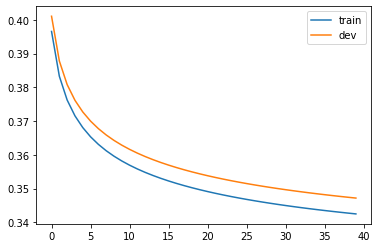

In [27]:
plt.plot(loss_train)
plt.plot(loss_validation)
plt.legend(['train', 'dev'])
plt.show()

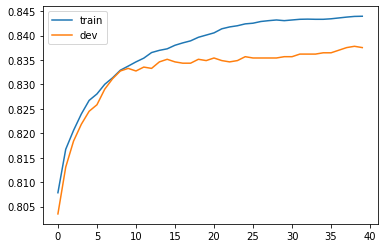

In [28]:
plt.plot(train_acc)
plt.plot(dev_acc)
plt.legend(['train', 'dev'])
plt.show()

In [ ]:
# OK, the above takes care of training
# Below, there should be the prediction part; now that we have the best b and w